In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# setting project path
import os
import sys

gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# setting style
sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette(palette='Blues_r')

## Background Information

This projects aims to create and train a predictive model on a dataset of Seattle Terry Stops Data. The initial data was obtain as a .csv file of 47,213 rows and 23 feature columns of Terry Stops Data.

Data set obtained from:
[Link](https://catalog.data.gov/dataset/terry-stops)

Data Columns Explanations:
[Link](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8)

## Initial EDA and Visualizations

In [2]:
path = os.path.join(gparent, 'data/processed', 'eda.csv')
df = pd.read_csv(path, keep_default_na=False)

In [3]:
df.head(2)

,Target,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,...,Officer Squad,Frisk Flag,Precinct,Weapon Flag,Reported Year,Reported Month,Day of Month,Day of Week,Reported Hour,Beat Flag
0,1,NA,Arrest,None,7500,1984,M,Black,Asian,Male,...,SOUTH PCT 1ST W - ROBERT,0,South,0,2015,10,16,4,11,1
1,0,NA,Field Contact,None,5670,1965,M,White,NA,NA,...,NA,0,NA,0,2015,3,19,3,7,0


## Visualizing the Proportion of Terry Stops by Race

In [5]:
# proportion of terry stops by race
stop_percent = df['Subject Perceived Race'].value_counts('normalize=True')

sdf = pd.DataFrame(stop_percent)
sdf.reset_index(inplace=True)
sdf.columns = ['Race', 'Percentage']

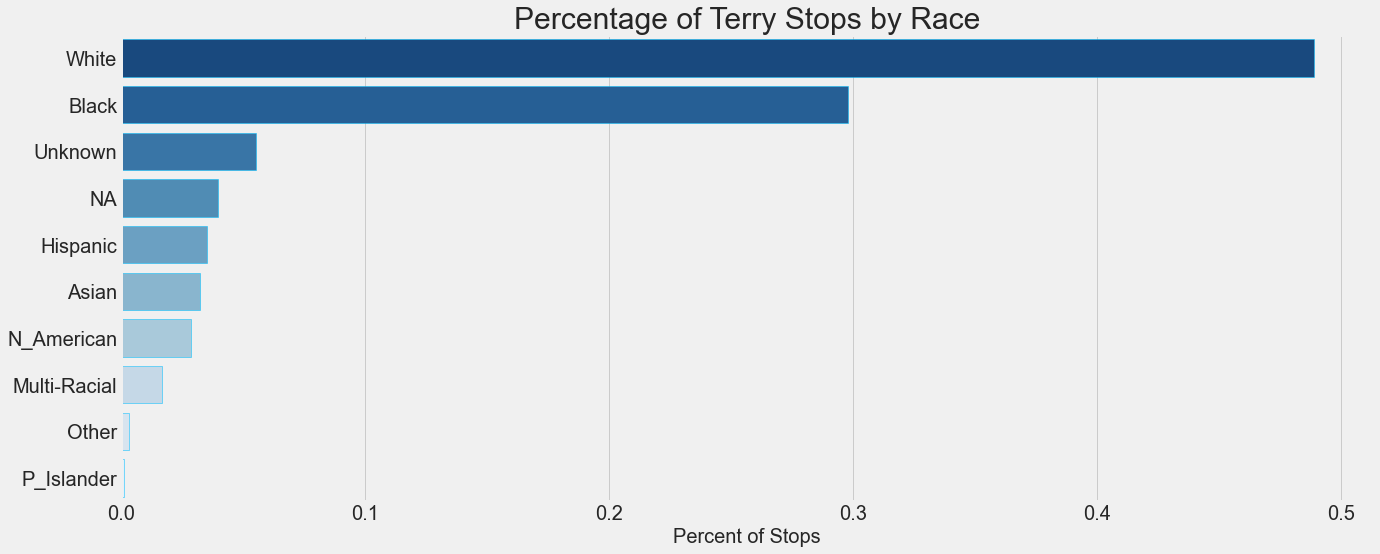

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='Percentage', y='Race', edgecolor='deepskyblue', palette='Blues_r', data=sdf)
ax.tick_params(labelsize=20)
plt.title('Percentage of Terry Stops by Race', fontsize=30)
plt.xlabel('Percent of Stops', fontsize=20)
plt.ylabel("")
plt.show()

## Proportion of Stops by Race

In [7]:
print(df['Subject Perceived Race'].value_counts())
df['Subject Perceived Race'].value_counts(normalize=True)

White           22951
Black           13985
Unknown          2607
NA               1870
Hispanic         1664
Asian            1524
N_American       1351
Multi-Racial      800
Other             152
P_Islander         56
Name: Subject Perceived Race, dtype: int64


White           0.488735
Black           0.297807
Unknown         0.055515
NA              0.039821
Hispanic        0.035434
Asian           0.032453
N_American      0.028769
Multi-Racial    0.017036
Other           0.003237
P_Islander      0.001193
Name: Subject Perceived Race, dtype: float64

## Visualizing the Proportion of Arrests by Race

In [8]:
# creating an arrest rate data frame and visualization
arrest_rates = df[df['Target']==1]['Subject Perceived Race'].value_counts(normalize=True)

adf = pd.DataFrame(arrest_rates)
adf.reset_index(inplace=True)
adf.columns = ['Race', 'Proportion of Arrests']

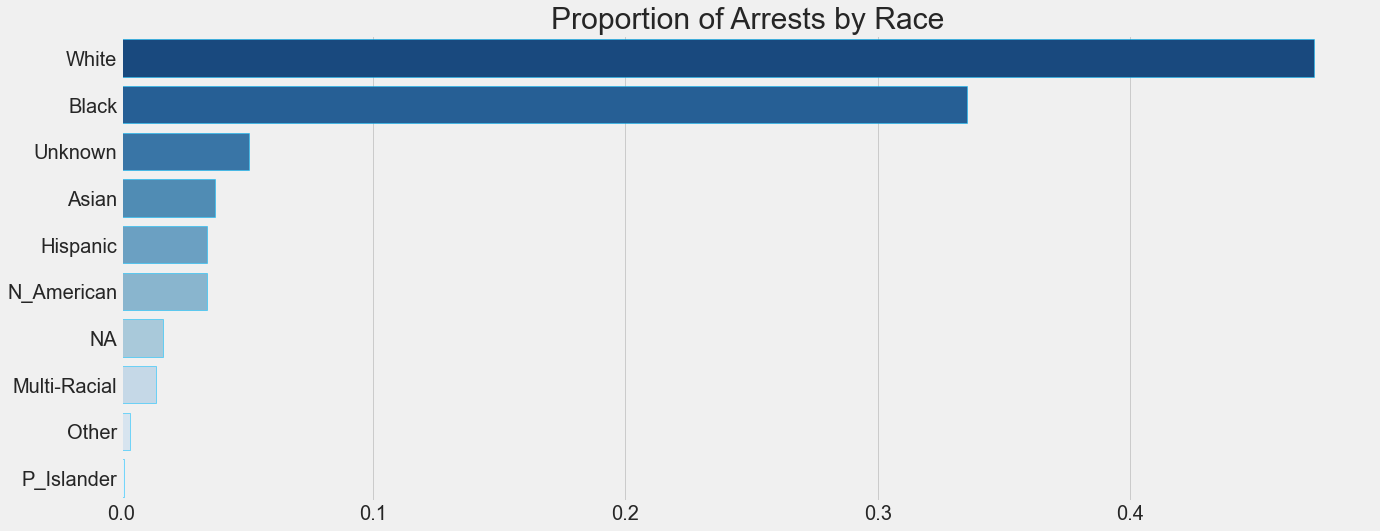

In [9]:
fig, ax = plt.subplots(figsize =(20, 8))
sns.barplot(x='Proportion of Arrests', y='Race', data=adf, edgecolor='deepskyblue', palette='Blues_r')
plt.title('Proportion of Arrests by Race', fontsize=30)
ax.tick_params(labelsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

## Proportion of Arrests by Race

In [10]:
# checking proportion of arrests by race
print(df[df['Stop Resolution'] == 'Arrest']['Subject Perceived Race'].value_counts())
df[df['Stop Resolution'] == 'Arrest']['Subject Perceived Race'].value_counts(normalize=True)

White           5491
Black           3894
Unknown          590
Asian            433
Hispanic         398
N_American       395
NA               193
Multi-Racial     162
Other             40
P_Islander        15
Name: Subject Perceived Race, dtype: int64


White           0.472914
Black           0.335372
Unknown         0.050814
Asian           0.037292
Hispanic        0.034278
N_American      0.034019
NA              0.016622
Multi-Racial    0.013952
Other           0.003445
P_Islander      0.001292
Name: Subject Perceived Race, dtype: float64

In [11]:
# mean arrest rate & arrest rates by race
mean_arrest_rate = adf['Proportion of Arrests'].mean()
print(f'Mean Arrest Rate: {round(mean_arrest_rate, 2)}')

Mean Arrest Rate: 0.1


## Analysis: Disproportionate Outcomes
We can see that when we compare the proportion of stops and arrests to the proportion of each race in the population there are wildly disproportionate outcomes for certain groups.

**According to July 1, 2019 US Census Data for Seattle**

- **Asian**: 15.4% of population, 3.2% of stops, 3.7% of arrests.

- **White**: (Non-Hispanic) 63.8% of population, 48.9% of stops, 47.3% of arrests.

- **Black**: 7.3% of population, 29.9% of stops, 33.5% of arrests.

- **Native American**: 0.5% of population, 2.9% of stops, 3.4% of arrests.

- **Hispanic**: 6.7% of population, 3.5% of stops, 3.4% of arrests.

- **Multi-Racial**: 6.9% of population, 1.7% of stops, 1.4% of arrests.

- **Pacific Islander**: 0.3% of population, .12% of stops, .13% of arrests.

The Unknown racial category is absent from the census data but makes up 5.6% of stops and 5.1% of arrests.

## Visualizing the Rate of Weapons Found
Checking to see if the stop and arrest rates are in line with the rate that weapons are found on subjects according to race. We'll calculate a weapons found rate by race and plot the results.

In [12]:
# creating a weapons by race data frame
wdf = pd.DataFrame(df.groupby('Subject Perceived Race')['Weapon Flag'].value_counts())

# calculating the weapons found rate by race
races = df['Subject Perceived Race'].unique()
hit_rates = []
for race in races:
    hits = wdf.loc[race]['Weapon Flag'][1]   #number of people in the racial group found with a weapon
    #total number in the racial group stopped
    total = df[df['Subject Perceived Race']\
               == race].value_counts().sum() 
    rate = hits/total
    hit_rates.append([race, rate])

#  calculating the meat weapons found rate
mean_hit_rate = np.array([hit_rates[i][1] for i in range(len(hit_rates))]).mean()

# creating a hit rate data frame and visualization
hr_df = pd.DataFrame(hit_rates, columns = ['Race', 'Hit Rate']).sort_values(by='Hit Rate', ascending=False)

In [13]:
wdf.loc['Black']['Weapon Flag'][1]

743

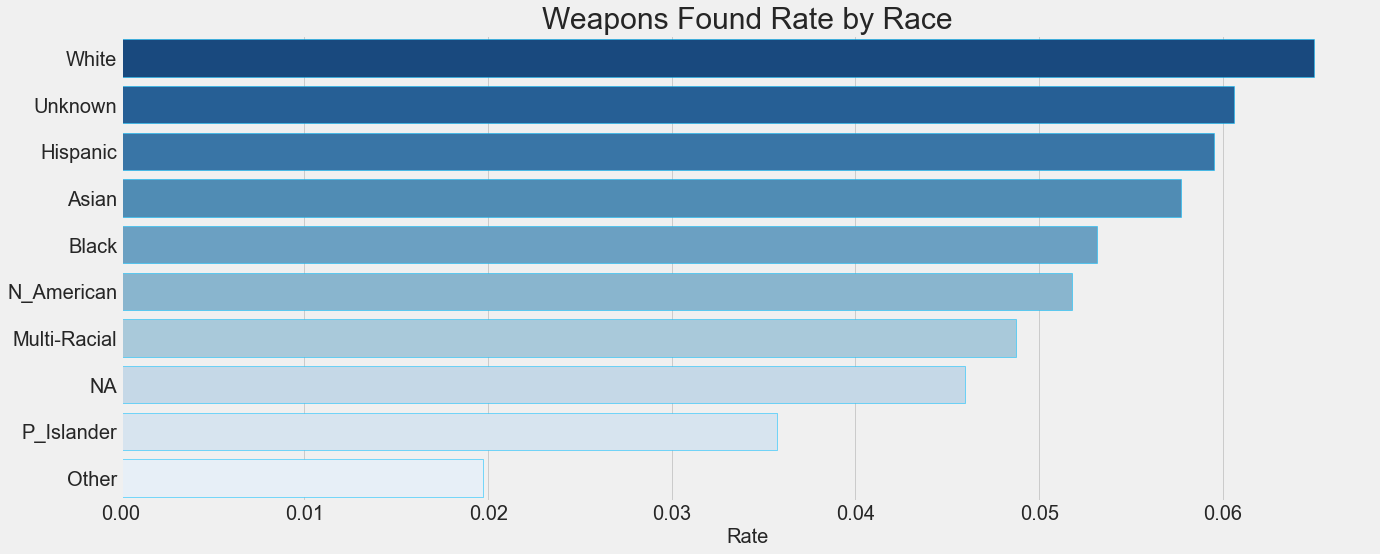

In [15]:
fig, ax = plt.subplots(figsize =(20, 8))
sns.barplot(y='Race', x='Hit Rate', data=hr_df, palette='Blues_r', edgecolor='deepskyblue')
plt.title('Weapons Found Rate by Race', fontsize=30)
ax.tick_params(labelsize=20)
plt.ylabel("")
plt.xlabel('Rate', fontsize=20)
plt.show()

In [21]:
print(f'Mean Weapon Found Rate: {mean_hit_rate}')
sorted(hit_rates, key=lambda x: x[1])[::-1]

Mean Weapon Found Rate: 0.04979407805711884


[['White', 0.06496448956472485],
 ['Unknown', 0.06060606060606061],
 ['Hispanic', 0.059495192307692304],
 ['Asian', 0.05774278215223097],
 ['Black', 0.0531283518055059],
 ['N_American', 0.05181347150259067],
 ['Multi-Racial', 0.04875],
 ['NA', 0.045989304812834225],
 ['P_Islander', 0.03571428571428571],
 ['Other', 0.019736842105263157]]

## Analysis
From the visualization and calculation above it appears that White & Hispanic subjects are stops less frequently than the weapons found rate suggests should be. Conversly, Asian, Black, Native American, and Pacific Islander subjects are stopped and arrested at a elevated rates relative the weapons found rate for each group.

## Visualizing Stop Resolutions by Race, Age & Gender

## Stop Outcomes by Race

In [ ]:
# making a list of the racial categories for visualization
races = df['Subject Perceived Race'].unique()

In [ ]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in races:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution']\
                        .value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.show()

## Unpacking The Racial Categories for Visual Clarity
The plot above is a little cluttered so we'll break up the categories into two different plots

In [ ]:
excluded = ['NA', 'Other', 'Unknown','Multi-Racial', 'P_Islander']
new_race_list = [x for x in races if x not in excluded]

In [ ]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in new_race_list:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution'].value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in excluded:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution'].value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.show()

## Stop Outcomes by Race

In [ ]:
# checking arrest outcomes by race
df.groupby('Subject Perceived Race')['Target']\
.value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)

## Analysis
We can see that Asian, Black, Native American and Pacific Islander subjects are arrested at a elevated rates relative to Hispanic, Multi-Racial,  and White subjects, confirming our earlier anaylsis.

## Plotting Stop Outcomes by Age Cohort

In [ ]:
#  getting age list
ages = df['Subject Age Group'].unique()

In [ ]:
# checking outcomes by age category
fig, axes=plt.subplots(figsize=(15,7))

for age in ages:
    age_df = df.groupby('Subject Age Group')['Stop Resolution'].value_counts(normalize=True)[age]
    age_df.plot(label=f'{age}')
plt.title('Stop Outcome by Age Cohort')    
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
df.groupby('Subject Age Group')['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)

## Analysis: Children and And Adults 45+ Are Arrested at Slighly Lower Rates Than Other Cohorts

## Visualizing Stop Outcomes By Gender

In [ ]:
# getting gender list
genders = df['Subject Perceived Gender'].unique()

In [ ]:
# checking outcome by gender
fig, axes=plt.subplots(figsize=(15,7))

for g in genders:
    age_df = df.groupby('Subject Perceived Gender')\
    ['Stop Resolution'].value_counts(normalize=True)[g]
    age_df.plot(label=f'{g}')
plt.title('Stop Outcome by Gender')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('Subject Perceived Gender')\
['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)

## Analysis: Male and Female Subjects Are Arrested at About the Same Rate
Both are arrested at a higher rate than gender diverse or ambiguous subjects.

## Visualizing the Target Feature

In [ ]:
# getting normalized target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')['Target'].value_counts().unstack()

# visualizing target values by race
target_race.plot(kind='barh', figsize=(15,7), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Stop Outcomes by Subject Race')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.ylabel("")
plt.show()

In [ ]:
# getting target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')\
                        ['Target'].value_counts(normalize=True).unstack()

# visualizing target values by race
target_race.plot(kind='barh', figsize=(15,8), color=['skyblue', 'darkblue'])
plt.title('Outcome Rates by Subject Race')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
target_race.sort_values(by=1, ascending=False)

## Analysis
Again we see that Asian, Black, Native American and Pacific Islander subjects are arrested at a elevated rates relative to Hispanic, Multi-Racial,  and White subjects, confirming our earlier anaylsis.

## Visualizing the Target by Subject Gender

In [ ]:
#  getting target value counts by gender
target_gender = df.groupby('Subject Perceived Gender')['Target'].value_counts().unstack()

# visualizing target values by gender
target_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Subject Gender')                                                 
plt.xlabel('Perceived Gender')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
#  getting target value counts by gender
target_gender = df.groupby('Subject Perceived Gender')\
['Target'].value_counts(normalize=True).unstack()

# visualizing target values by gender
target_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcome Rates by Subject Gender')                                                 
plt.xlabel('Perceived Gender')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
target_gender.sort_values(by=1, ascending=False)

## Analysis: Male and Female Subjects Are Arrested at About the Same Rate
Both are arrested at a higher rate than gender diverse or ambiguous subjects.

## Visualizing the Target by Officer Race

In [ ]:
# getting target value counts by officer race
officer_races = df.groupby('Officer Race')['Target'].value_counts().unstack()

officer_races.plot(kind='barh', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Officer Race')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
officer_races = df.groupby('Officer Race')['Target'].value_counts(normalize=True).unstack()

officer_races.plot(kind='barh', figsize=(15,8), color=['skyblue', 'darkblue'])

plt.title('Outcome Rates by Officer Race')
plt.xlabel('Officer Race')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
df.groupby('Officer Race')['Target'].value_counts(normalize=True)\
.unstack().sort_values(by=1, ascending=False)

## Analysis: Black & Pacific Islander Officers are Less Likely to Arrest Subjects

## Visualizing the Target by Officer Gender

In [ ]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts().unstack()

officer_gender.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Outcomes by Officer Gender', fontsize=30)
plt.xlabel('Officer Gender', fontsize=20)
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts(normalize=True).unstack()

ax = officer_gender.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Outcome Rates by Officer Gender', fontsize=30)
ax.tick_params(labelsize=20)
plt.xticks(rotation=0)
plt.xlabel('Officer Gender', fontsize=20)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
df.groupby('Officer Gender')['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)                             

## Analysis: Male Officer Slightly More Likely to Arrest Subjects

## Visualizing the Target by Precinct

In [ ]:
pdf = df.groupby('Precinct')['Target'].value_counts().unstack()
pdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Precinct', fontsize=30)
plt.xlabel('')
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
pdf = df.groupby('Precinct')['Target'].value_counts(normalize=True).unstack()
pdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Precinct', fontsize=30)
plt.xlabel('')
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
pdf.sort_values(by=1,ascending=False)

## Analysis: Stops With No Precinct Information Are Much Less Likely to End in Arrest
Stops in the North and Southwest precincts are also less likely to end in arrest.

## Visualizing the Target by Beat

In [ ]:
bdf = df.groupby('Beat Flag')['Target'].value_counts().unstack()
bdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Beat Flag', fontsize=30)
plt.xlabel('')
plt.xticks(np.arange(2), ['No Beat Listed','Beat Listed'], rotation=0)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
bdf = df.groupby('Beat Flag')['Target'].value_counts(normalize=True).unstack()
bdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Beat Flag', fontsize=30)
plt.xlabel('')
plt.xticks(np.arange(2), ['No Beat Listed','Beat Listed'], rotation=0)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
bdf.sort_values(by=1, ascending=False)

## Analysis: Stops With No Beat Information Are Much Less Likely to End in Arrest

## Proportion of Stops by Race

In [ ]:
beats = df.groupby(['Beat Flag'])['Subject Perceived Race'].value_counts(normalize=True).unstack()

In [ ]:
beats.loc[1].plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.xticks(rotation=0)
plt.title('Proportion of Stops By Race For Beat NA' , fontsize=25)
plt.xlabel('Call Type', fontsize=20)
plt.show()

In [ ]:
print(beats.loc[1].sort_values(ascending=False))
df['Subject Perceived Race'].value_counts(normalize=True)

In [ ]:
beats.loc[beats.index != 1].value_counts()

In [ ]:
df['Beat Flag'].value_counts(normalize=True)[:25]

## Visualizing the Target by Call Type

In [ ]:
cdf = df.groupby('Call Type')['Target'].value_counts().unstack()
cdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
cdf = df.groupby('Call Type')['Target'].value_counts(normalize=True).unstack()
cdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

In [ ]:
df['Call Type'].value_counts(normalize=True)

In [ ]:
cdf.sort_values(by=1, ascending=False)

## Analysis: 45% of Stops Originate from 911 Calls and 19% Are Initiated by Officer Observations
- 33% of 911 originated stops end in arrest.
- 31% of officer initiated stops end in arrest.
- 6% of stops with no origination information end in arrest.

## Initial Call Type

In [4]:
df['Initial Call Type'].value_counts(normalize=True)

NA                                                0.279067
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.067206
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.063394
DISTURBANCE, MISCELLANEOUS/OTHER                  0.051682
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.042611
                                                    ...   
MISSING - ADULT                                   0.000021
KNOWN KIDNAPPNG                                   0.000021
MISSING - (ALZHEIMER, ENDANGERED, ELDERLY)        0.000021
ALARM - ATM MACHINE, FREE STANDING                0.000021
HARBOR - WATER EMERGENCIES                        0.000021
Name: Initial Call Type, Length: 167, dtype: float64

## Binarizing Initial Call

In [ ]:
df['Initial Call Type'] = df['Initial Call Type'].replace('NA', 0)
df['Initial Call Type'] = df['Initial Call Type'].map(lambda x: 1 if x!=0 else 0)

In [ ]:
df['Initial Call Type'].value_counts()

In [ ]:
call_bin = df.groupby('Initial Call Type')['Target'].value_counts(normalize=True).unstack()
call_bin.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.xticks(rotation=0)
plt.title('Outcome Rates by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['No Arrest', 'Arrest'])
plt.show()

## Visualizing Officers With Most Arrests

In [ ]:
# checking out arrests by officer id
arrests = df[df['Target']==1]
oid = arrests.groupby('Officer ID')['Target'].value_counts()
officer_df = pd.DataFrame(oid)
officer_df.columns = ['Arrests']
officer_df = officer_df.reset_index()
top20 = officer_df.drop('Target', axis=1).sort_values(by='Arrests', ascending=False)[:20]

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='Arrests', y='Officer ID', edgecolor='deepskyblue', palette='Blues_r', data=top20)
plt.title('Top 20 Officers by Arrest')
plt.show()

In [ ]:
# top 20 officers by arrest
top20